In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, Lasso , Ridge ,LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.metrics import f1_score,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder , LabelEncoder,MinMaxScaler
from sklearn import linear_model
import math
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
# from imblearn.under_sampling import RandomUnderSampler
# import xgboost as xgb
# from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor , plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier , RandomForestRegressor
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('diabetes.csv')
print (df.shape)
df.head ()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.loc[:, df.columns != 'Outcome'] = df.loc[:, df.columns != 'Outcome'].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### EDA

In [5]:
df.isna ().sum ()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
df.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [8]:
df.duplicated().sum()

0

### important columns

<AxesSubplot: >

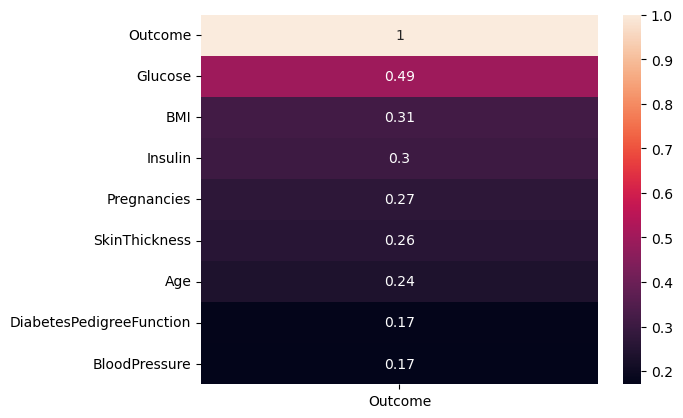

In [9]:
corr_matrix = df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)
sns.heatmap(corr_matrix, annot=True)

In [10]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: >

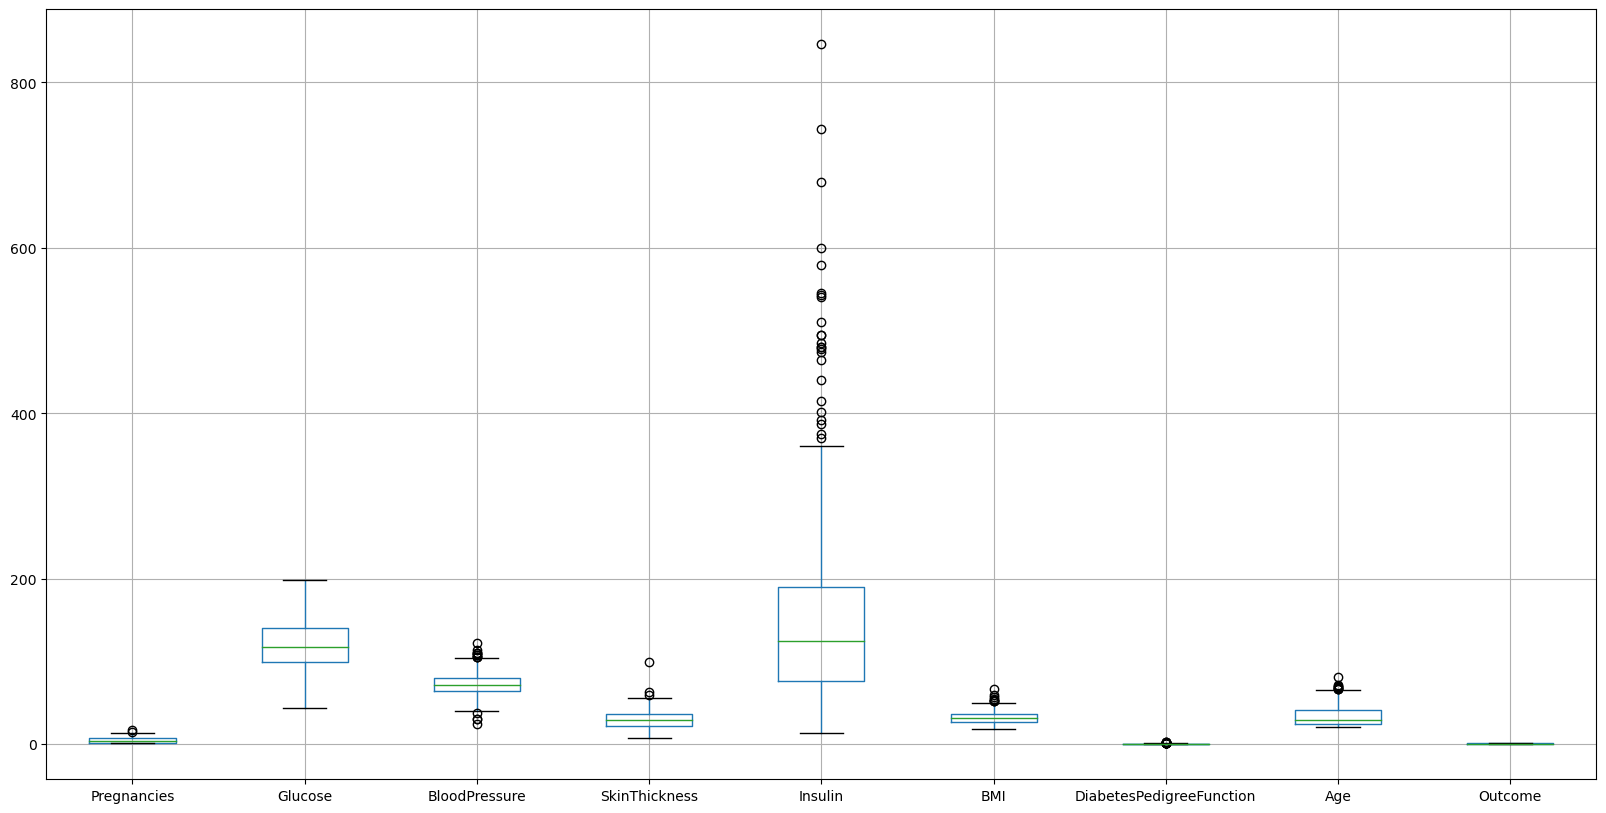

In [11]:
df.boxplot(figsize=(20,10))

In [12]:
columns = df.columns[:-1]

for col in columns:
    if df[col].dtype in ['int64', 'float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan

imputer = KNNImputer(n_neighbors=5, weights='distance')  
df[columns] = imputer.fit_transform(df[columns])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,166.229773,33.6,0.627000,50.0,1
1,1.000000,85.0,66.0,29.000000,60.705334,26.6,0.351000,31.0,0
2,8.000000,183.0,64.0,29.317349,172.109164,23.3,0.672000,32.0,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,6.652342,137.0,40.0,35.000000,168.000000,43.1,0.361289,33.0,1


<AxesSubplot: >

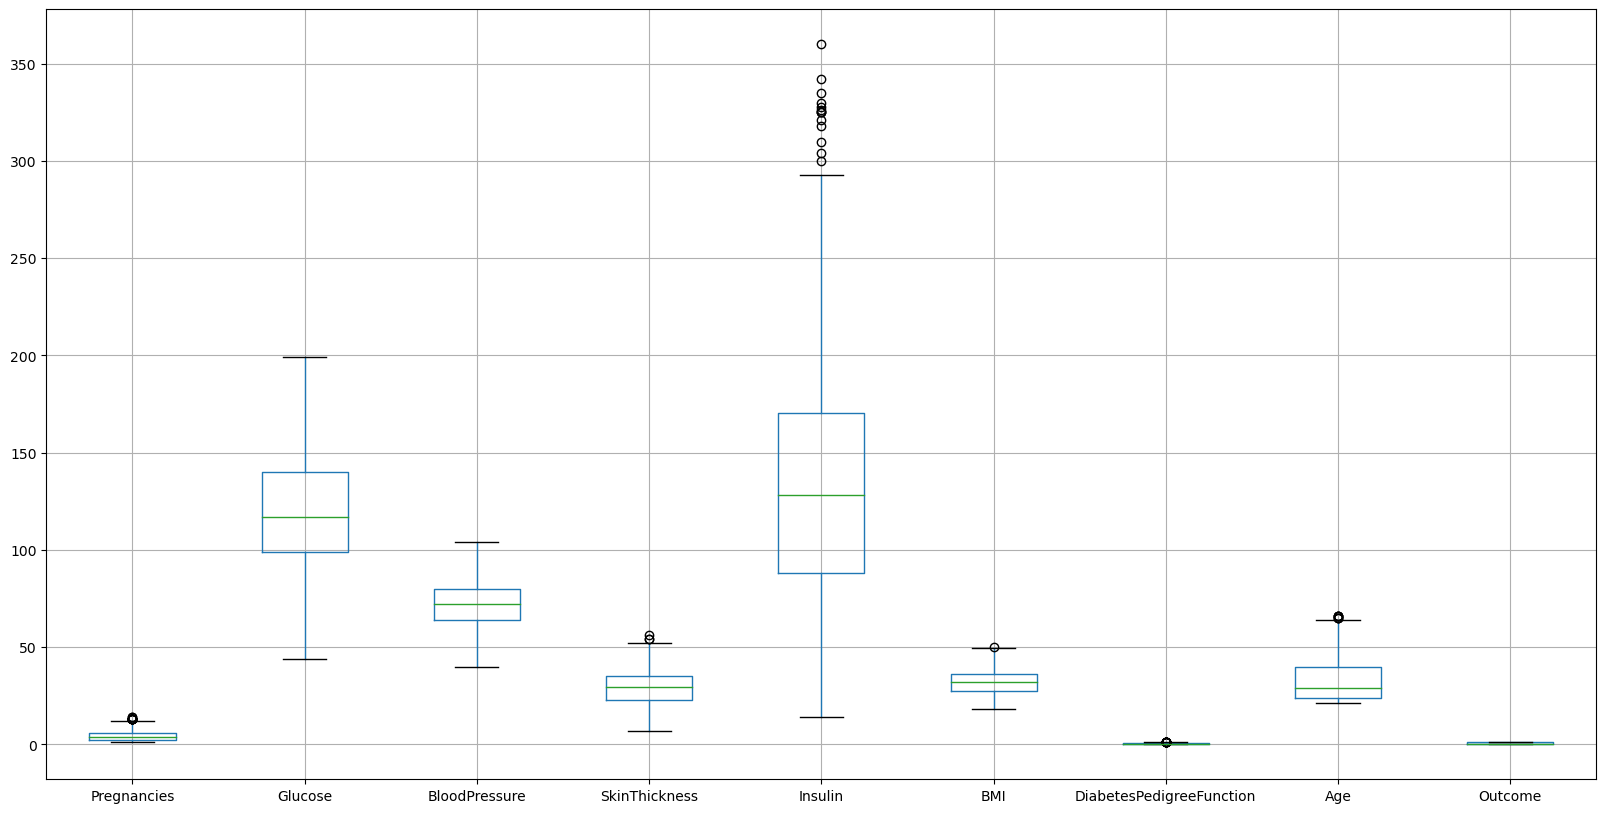

In [13]:
df.boxplot(figsize=(20,10))

### split : train , val , test

In [14]:
x = df.drop(["Outcome", "BloodPressure", "SkinThickness"], axis=1)
y = df['Outcome']

In [15]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (460, 6)
x_val shape: (154, 6)
x_test shape: (154, 6)
y_train shape: (460,)
y_val shape: (154,)
y_test shape: (154,)


### LogisticRegression without StandardScaler or sampling

In [16]:
log_model = LogisticRegression()

log_model.fit(x_train, y_train)

y_pred_train = log_model.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = log_model.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 0.758695652173913
Mean Absolute Error_train: 0.24130434782608695
Mean Squared Error_train: 0.24130434782608695
Root Mean Squared Error_train: 0.49122738912451425
R2 Score_train: -0.04622571920334395
classification_report_train:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       294
           1       0.70      0.58      0.64       166

    accuracy                           0.76       460
   macro avg       0.74      0.72      0.73       460
weighted avg       0.75      0.76      0.75       460

**************************************************
acc_val: 0.7662337662337663
Mean Absolute Error_val: 0.23376623376623376
Mean Squared Error_val: 0.23376623376623376
Root Mean Squared Error_val: 0.48349377841522817
R2 Score_val: -0.06615384615384601
classification_report_train:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       104
           1       0.63      0.66      0.6

### RandomForestClassifier without StandardScaler or sampling

In [15]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(x_train, y_train)

y_pred_train = random_forest_model.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = random_forest_model.predict(x_val)

print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_val: 0.7792207792207793
Mean Absolute Error_val: 0.22077922077922077
Mean Squared Error_val: 0.22077922077922077
Root Mean Squared Error_val: 0.4698714938993648
R2 Score_val: -0.00692307692307681
classification_report_train:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       104
           1       0.66      0.66      0.66        50

    accuracy                           0.78       154
   macro avg 

In [16]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred_train = grid_search.predict(x_train)
print('acc_train:', accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:', mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)

y_pred_val = grid_search.predict(x_val)
print('acc_val:', accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:', mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_val:\n', classification_report(y_val, y_pred_val))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_co

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
acc_train: 0.9239130434782609
Mean Absolute Error_train: 0.07608695652173914
Mean Squared Error_train: 0.07608695652173914
Root Mean Squared Error_train: 0.27583864218368526
R2 Score_train: 0.6701090074584051
classification_report_train:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       294
           1       0.93      0.85      0.89       166

    accuracy                           0.92       460
   macro avg       0.93      0.91      0.92       460
weighted avg       0.92      0.92      0.92       460

**************************************************
acc_val: 0.7987012987012987
Mean Absolute Error_val: 0.2012987012987013
Mean Squared Error_val: 0.2012987012987013
Root Mean Squared Error_val: 0.44866323818505716
R2 Score_val: 0.08192307692307699
classification_report_val:
            

### DecisionTreeClassifier without StandardScaler or sampling

In [17]:
Decision_Tree_model = DecisionTreeClassifier()

Decision_Tree_model.fit(x_train, y_train)

y_pred_train = Decision_Tree_model.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = Decision_Tree_model.predict(x_val)

print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_val: 0.6818181818181818
Mean Absolute Error_val: 0.3181818181818182
Mean Squared Error_val: 0.3181818181818182
Root Mean Squared Error_val: 0.5640760748177662
R2 Score_val: -0.451153846153846
classification_report_train:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       104
           1       0.51      0.60      0.55        50

    accuracy                           0.68       154
   macro avg     

### xgboost without StandardScaler or sampling

In [18]:
xgboost_model = xgb.XGBClassifier(random_state=42)

xgboost_model.fit(x_train, y_train)

y_pred_train = xgboost_model.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)


y_pred_val = xgboost_model.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))


acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_val: 0.7662337662337663
Mean Absolute Error_val: 0.23376623376623376
Mean Squared Error_val: 0.23376623376623376
Root Mean Squared Error_val: 0.48349377841522817
R2 Score_val: -0.06615384615384601
classification_report_train:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       104
           1       0.63      0.68      0.65        50

    accuracy                           0.77       154
   macro avg

### Scaler

In [19]:
Scaler = StandardScaler()

x_train_scaled = Scaler.fit_transform(x_train)
x_val_scaled = Scaler.transform(x_val)
x_test_scaled = Scaler.transform(x_test)

### LogisticRegression with StandardScaler 

In [20]:
log_model_scaled = LogisticRegression()

log_model_scaled.fit(x_train_scaled, y_train)

y_pred_train = log_model_scaled.predict(x_train_scaled)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = log_model_scaled.predict(x_val_scaled)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 0.7695652173913043
Mean Absolute Error_train: 0.23043478260869565
Mean Squared Error_train: 0.23043478260869565
Root Mean Squared Error_train: 0.48003623051671385
R2 Score_train: 0.0009015654454553879
classification_report_train:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       294
           1       0.72      0.58      0.65       166

    accuracy                           0.77       460
   macro avg       0.76      0.73      0.74       460
weighted avg       0.77      0.77      0.76       460

**************************************************
acc_val: 0.7662337662337663
Mean Absolute Error_val: 0.23376623376623376
Mean Squared Error_val: 0.23376623376623376
Root Mean Squared Error_val: 0.48349377841522817
R2 Score_val: -0.06615384615384601
classification_report_train:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       104
           1       0.63      0.66      0

### RandomForestClassifier with StandardScaler 

In [21]:
Random_Forest_model_scaled = RandomForestClassifier()

Random_Forest_model_scaled.fit(x_train_scaled, y_train)

y_pred_train = Random_Forest_model_scaled.predict(x_train_scaled)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = Random_Forest_model_scaled.predict(x_val_scaled)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_val: 0.7922077922077922
Mean Absolute Error_val: 0.2077922077922078
Mean Squared Error_val: 0.2077922077922078
Root Mean Squared Error_val: 0.4558423058385518
R2 Score_val: 0.05230769230769239
classification_report_train:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       104
           1       0.67      0.72      0.69        50

    accuracy                           0.79       154
   macro avg    

###  DecisionTreeClassifier with StandardScaler 

In [22]:
Decision_Tree_model_scaled = DecisionTreeClassifier()


Decision_Tree_model_scaled.fit(x_train_scaled, y_train)

y_pred_train = Decision_Tree_model_scaled.predict(x_train_scaled)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = Decision_Tree_model_scaled.predict(x_val_scaled)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_val: 0.6818181818181818
Mean Absolute Error_val: 0.3181818181818182
Mean Squared Error_val: 0.3181818181818182
Root Mean Squared Error_val: 0.5640760748177662
R2 Score_val: -0.451153846153846
classification_report_train:
               precision    recall  f1-score   support

           0       0.81      0.69      0.75       104
           1       0.51      0.66      0.57        50

    accuracy                           0.68       154
   macro avg     

### xgboost with StandardScaler 

In [23]:
xgboost_model_scaled = xgb.XGBClassifier(random_state=42)


xgboost_model_scaled.fit(x_train_scaled, y_train)

y_pred_train = xgboost_model_scaled.predict(x_train_scaled)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = xgboost_model_scaled.predict(x_val_scaled)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_val: 0.7662337662337663
Mean Absolute Error_val: 0.23376623376623376
Mean Squared Error_val: 0.23376623376623376
Root Mean Squared Error_val: 0.48349377841522817
R2 Score_val: -0.06615384615384601
classification_report_train:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       104
           1       0.63      0.68      0.65        50

    accuracy                           0.77       154
   macro avg

### under sampling

In [24]:
# under sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_under,y_under = rus.fit_resample(x,y)
print(X_under.shape)
print(y_under.value_counts())


(536, 6)
Outcome
0    268
1    268
Name: count, dtype: int64


In [25]:
x_train, x_temp, y_train, y_temp = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### LogisticRegression with under sampling

In [26]:
log_model_under_sampling = LogisticRegression()

log_model_under_sampling.fit(x_train, y_train)

y_pred_train = log_model_under_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = log_model_under_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 0.7289719626168224
Mean Absolute Error_train: 0.27102803738317754
Mean Squared Error_train: 0.27102803738317754
Root Mean Squared Error_train: 0.5206035318581478
R2 Score_train: -0.08470428874177949


classification_report_train:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       209
           1       0.75      0.71      0.73       219

    accuracy                           0.73       428
   macro avg       0.73      0.73      0.73       428
weighted avg       0.73      0.73      0.73       428

**************************************************
acc_val: 0.7222222222222222
Mean Absolute Error_val: 0.2777777777777778
Mean Squared Error_val: 0.2777777777777778
Root Mean Squared Error_val: 0.5270462766947299
R2 Score_val: -0.1505681818181821
classification_report_train:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.68      0.59      0.63        22

    accuracy                           0.72        54
   macro avg       0.71      0.70      0.71        54
weighted avg       0.72      0.72      0.72        54



### RandomForestClassifier with under sampling

In [27]:
Random_Forest_model_under_sampling = RandomForestClassifier()

Random_Forest_model_under_sampling.fit(x_train, y_train)

y_pred_train = Random_Forest_model_under_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = Random_Forest_model_under_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       219

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

**************************************************
acc_val: 0.7037037037037037
Mean Absolute Error_val: 0.2962962962962963
Mean Squared Error_val: 0.2962962962962963
Root Mean Squared Error_val: 0.5443310539518174
R2 Score_val: -0.22727272727272751
classification_report_train:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.64      0.64      0.64        22

    accuracy                           0.70        54
   macro avg   

### DecisionTreeClassifier with under sampling

In [28]:
Decision_Tree_model_under_sampling = DecisionTreeClassifier()

Decision_Tree_model_under_sampling.fit(x_train, y_train)

y_pred_train = Decision_Tree_model_under_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = Decision_Tree_model_under_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       219

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

**************************************************
acc_val: 0.6296296296296297
Mean Absolute Error_val: 0.37037037037037035
Mean Squared Error_val: 0.37037037037037035
Root Mean Squared Error_val: 0.6085806194501846
R2 Score_val: -0.5340909090909094
classification_report_train:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        32
           1       0.55      0.55      0.55        22

    accuracy                           0.63        54
   macro avg  

### xgboost with under sampling

In [29]:
xgboost_model_under_sampling = xgb.XGBClassifier(random_state=42)

xgboost_model_under_sampling.fit(x_train, y_train)

y_pred_train = xgboost_model_under_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = xgboost_model_under_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       219

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

**************************************************
acc_val: 0.6851851851851852
Mean Absolute Error_val: 0.3148148148148148
Mean Squared Error_val: 0.3148148148148148
Root Mean Squared Error_val: 0.5610836076867821
R2 Score_val: -0.30397727272727293
classification_report_train:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73        32
           1       0.61      0.64      0.62        22

    accuracy                           0.69        54
   macro avg   

### Oversampling

In [30]:
# Oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

X_over,y_over = sm.fit_resample(x,y)
print(X_over.shape)
print(y_over.value_counts())


(1000, 6)
Outcome
1    500
0    500
Name: count, dtype: int64


In [31]:
x_train, x_temp, y_train, y_temp = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### LogisticRegression with Oversampling

In [32]:
log_model_Over_sampling = LogisticRegression()

log_model_Over_sampling.fit(x_train, y_train)

y_pred_train = log_model_Over_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = log_model_Over_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 0.745
Mean Absolute Error_train: 0.255
Mean Squared Error_train: 0.255
Root Mean Squared Error_train: 0.5049752469181039
R2 Score_train: -0.020006375039844038
classification_report_train:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       401
           1       0.76      0.72      0.74       399

    accuracy                           0.74       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.75      0.74      0.74       800

**************************************************
acc_val: 0.71
Mean Absolute Error_val: 0.29
Mean Squared Error_val: 0.29
Root Mean Squared Error_val: 0.5385164807134504
R2 Score_val: -0.1717171717171717
classification_report_train:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        45
           1       0.75      0.71      0.73        55

    accuracy                           0.71       100
   macro avg       

In [33]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred_train = grid_search.predict(x_train)
print('acc_train:', accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:', mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)

y_pred_val = grid_search.predict(x_val)
print('acc_val:', accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:', mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_val:\n', classification_report(y_val, y_pred_val))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
acc_train: 0.755
Mean Absolute Error_train: 0.245
Mean Squared Error_train: 0.245
Root Mean Squared Error_train: 0.4949747468305833
R2 Score_train: 0.01999387496171834
classification_report_train:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       401
           1       0.76      0.74      0.75       399

    accuracy                           0.76       800
   macro avg       0.76      0.75      0.75       800
weighted avg       0.76      0.76      0.75       800

**************************************************
acc_val: 0.73
Mean Absolute Error_val: 0.27
Mean Squared Error_val: 0.27
Root Mean Squared Error_val: 0.5196152422706632
R2 Score_val: -0.09090909090909083
classification_report_val:
               precision    recall  f1-score   support

           0       0.70      0.71      0

### RandomForestClassifier with Oversampling

In [34]:
Random_Forest_model_Over_sampling = RandomForestClassifier()

Random_Forest_model_Over_sampling.fit(x_train, y_train)

y_pred_train = Random_Forest_model_Over_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = Random_Forest_model_Over_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       399

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

**************************************************
acc_val: 0.74
Mean Absolute Error_val: 0.26
Mean Squared Error_val: 0.26
Root Mean Squared Error_val: 0.5099019513592785
R2 Score_val: -0.05050505050505061
classification_report_train:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72        45
           1       0.77      0.75      0.76        55

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
wei

In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred_train = grid_search.predict(x_train)
print('acc_train:', accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:', mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)

y_pred_val = grid_search.predict(x_val)
print('acc_val:', accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:', mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_val:\n', classification_report(y_val, y_pred_val))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       399

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

**************************************************
acc_val: 0.72
Mean Absolute Error_val: 0.28
Mean Squared Error_val: 0.28
Root Mean Squared Error_val: 0.5291502622129182
R2 Score_val: -0.13131313131313127
classification_report_val:
               precision    recall  f1-score   support

           0       0.68      0.71  

### DecisionTreeClassifier with Oversampling

In [36]:
Decision_Tree_model_Over_sampling = DecisionTreeClassifier()

Decision_Tree_model_Over_sampling.fit(x_train, y_train)

y_pred_train = Decision_Tree_model_Over_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = Decision_Tree_model_Over_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       399

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

**************************************************
acc_val: 0.73
Mean Absolute Error_val: 0.27
Mean Squared Error_val: 0.27
Root Mean Squared Error_val: 0.5196152422706632
R2 Score_val: -0.09090909090909083
classification_report_train:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72        45
           1       0.78      0.71      0.74        55

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
wei

In [37]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred_train = grid_search.predict(x_train)
print('acc_train:', accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:', mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)

y_pred_val = grid_search.predict(x_val)
print('acc_val:', accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:', mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_val:\n', classification_report(y_val, y_pred_val))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
acc_train: 0.92625
Mean Absolute Error_train: 0.07375
Mean Squared Error_train: 0.07375
Root Mean Squared Error_train: 0.27156951228000537
R2 Score_train: 0.7049981562384764
classification_report_train:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       401
           1       0.92      0.94      0.93       399

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

**************************************************
acc_val: 0.74
Mean Absolute Error_val: 0.26
Mean Squared Error_val: 0.26
Root Mean Squared Error_val: 0.5099019513592785
R2 Score_val: -0.05050505050505061
classification_report_val:
               preci

c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Legion\anaconda3\envs\aly_env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_cons

### xgboost with Oversampling

In [38]:
xgboost_model_Over_sampling = xgb.XGBClassifier(random_state=42)

xgboost_model_Over_sampling.fit(x_train, y_train)

y_pred_train = xgboost_model_Over_sampling.predict(x_train)
print('acc_train:',accuracy_score(y_train, y_pred_train))
print('Mean Absolute Error_train:',mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error_train:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 Score_train:', r2_score(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = xgboost_model_Over_sampling.predict(x_val)
print('acc_val:',accuracy_score(y_val, y_pred_val))
print('Mean Absolute Error_val:',mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error_val:', mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error_val:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('R2 Score_val:', r2_score(y_val, y_pred_val))
print('classification_report_train:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
Mean Absolute Error_train: 0.0
Mean Squared Error_train: 0.0
Root Mean Squared Error_train: 0.0
R2 Score_train: 1.0
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       399

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

**************************************************
acc_val: 0.75
Mean Absolute Error_val: 0.25
Mean Squared Error_val: 0.25
Root Mean Squared Error_val: 0.5
R2 Score_val: -0.010101010101010166
classification_report_train:
               precision    recall  f1-score   support

           0       0.76      0.64      0.70        45
           1       0.74      0.84      0.79        55

    accuracy                           0.75       100
   macro avg       0.75      0.74      0.74       100
weighted avg     

### best model is LogisticRegression without StandardScaler or sampling

In [39]:
y_pred_val = log_model.predict(x_test)
print('acc_test:',accuracy_score(y_test, y_pred_val))
print('Mean Absolute Error_test:',mean_absolute_error(y_test, y_pred_val))
print('Mean Squared Error_test:', mean_squared_error(y_test, y_pred_val))
print('Root Mean Squared Error_test:', np.sqrt(mean_squared_error(y_test, y_pred_val)))
print('R2 Score_test:', r2_score(y_test, y_pred_val))
print('classification_report_test:\n', classification_report(y_test, y_pred_val))

acc_test: 0.75
Mean Absolute Error_test: 0.25
Mean Squared Error_test: 0.25
Root Mean Squared Error_test: 0.5
R2 Score_test: -0.006441223832528431
classification_report_test:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        54
           1       0.74      0.70      0.72        46

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100

